# Models from the R stemming process

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [4]:
data = pd.read_csv('../../datasets/data-stemmed-R.csv')
data.info()
Y = data['engagement.rate']
data['engagement.rate'].fillna(data['engagement.rate'].mean(), inplace=True)
X = data.drop(columns=['engagement.rate'])
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4078 entries, 0 to 4077
Columns: 230 entries, chicken to n_emoji
dtypes: bool(9), float64(215), int64(6)
memory usage: 6.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4078 entries, 0 to 4077
Columns: 229 entries, chicken to n_emoji
dtypes: bool(9), float64(214), int64(6)
memory usage: 6.9 MB


In [5]:
reg_metrics_text = pd.DataFrame(columns=['Model', 'MAE', 'RMSE', 'MAPE', 'R2'])

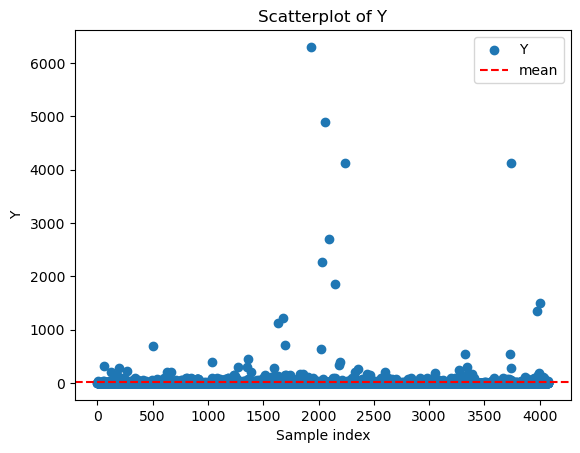

In [6]:
dummy_kfolds = KFold(n_splits=10, shuffle=True)
for train_idx, test_idx in dummy_kfolds.split(X):
    dummy_regressor = DummyRegressor()
    dummy_regressor.fit(X.iloc[train_idx], Y.iloc[train_idx])
    y_dummy_reg = dummy_regressor.predict(X.iloc[test_idx])
    current_dummy_mae = mean_absolute_error(Y.iloc[test_idx], y_dummy_reg)
    current_dummy_mse = mean_squared_error(Y.iloc[test_idx], y_dummy_reg)
    current_dummy_rmse = np.sqrt(current_dummy_mse)
    current_dummy_mape = mean_absolute_percentage_error(Y.iloc[test_idx], y_dummy_reg)
    current_dummy_r2 = r2_score(Y.iloc[test_idx], y_dummy_reg)
    reg_metrics_text.loc[len(reg_metrics_text)] = ['DUMMY', current_dummy_mae, current_dummy_rmse, current_dummy_mape, current_dummy_r2]

#Scatterplot of Y
mean_y = np.mean(Y)
plt.scatter(np.arange(len(Y)), Y, label='Y')
plt.axhline(y=mean_y, color='r', linestyle='--', label='mean')    # Plot the mean
plt.title('Scatterplot of Y')
plt.xlabel('Sample index')
plt.ylabel('Y')
plt.legend()
plt.show()

In [7]:
# Decision Tree Regressor
# Initialize a decision tree regressor instance
tree_kfolds = KFold(n_splits=10, shuffle=True)
for train_idx, test_idx in tree_kfolds.split(X):
    tree_regressor = DecisionTreeRegressor()
    tree_regressor.fit(X.iloc[train_idx], Y.iloc[train_idx])
    y_tree_reg = tree_regressor.predict(X.iloc[test_idx])
    current_tree_mae = mean_absolute_error(Y.iloc[test_idx], y_tree_reg)
    current_tree_mse = mean_squared_error(Y.iloc[test_idx], y_tree_reg)
    current_tree_rmse = np.sqrt(current_tree_mse)
    current_tree_mape = mean_absolute_percentage_error(Y.iloc[test_idx], y_tree_reg)
    current_tree_r2 = r2_score(Y.iloc[test_idx], y_tree_reg)
    reg_metrics_text.loc[len(reg_metrics_text)] = ['TREE', current_tree_mae, current_tree_rmse, current_tree_mape, current_tree_r2]

In [8]:
# Random Forest Regressor
# Initialize a random forest regressor instance
rf_kfolds = KFold(n_splits=10, shuffle=True)
for train_idx, test_idx in rf_kfolds.split(X):
    rf_regressor = RandomForestRegressor(n_estimators=100, min_samples_leaf=100, random_state=42)
    rf_regressor.fit(X.iloc[train_idx], Y.iloc[train_idx])
    y_rf_reg = rf_regressor.predict(X.iloc[test_idx])
    current_rf_mae = mean_absolute_error(Y.iloc[test_idx], y_rf_reg)
    current_rf_mse = mean_squared_error(Y.iloc[test_idx], y_rf_reg)
    current_rf_rmse = np.sqrt(current_rf_mse)
    current_rf_mape = mean_absolute_percentage_error(Y.iloc[test_idx], y_rf_reg)
    current_rf_r2 = r2_score(Y.iloc[test_idx], y_rf_reg)
    reg_metrics_text.loc[len(reg_metrics_text)] = ['RF', current_rf_mae, current_rf_rmse, current_rf_mape, current_rf_r2]

In [ ]:
sv_kfolds = KFold(n_splits=10, shuffle=True)
for train_idx, test_idx in sv_kfolds.split(X):
    sv_regressor = SVR()
    sv_regressor.fit(X.iloc[train_idx], Y.iloc[train_idx])
    y_sv_reg = sv_regressor.predict(X.iloc[test_idx])
    current_sv_mae = mean_absolute_error(Y.iloc[test_idx], y_sv_reg)
    current_sv_mse = mean_squared_error(Y.iloc[test_idx], y_sv_reg)
    current_sv_rmse = np.sqrt(current_sv_mse)
    current_sv_mape = mean_absolute_percentage_error(Y.iloc[test_idx], y_sv_reg)
    current_sv_r2 = r2_score(Y.iloc[test_idx], y_sv_reg)
    reg_metrics_text.loc[len(reg_metrics_text)] = ['SVM', current_sv_mae, current_sv_rmse, current_sv_mape, current_sv_r2]

In [ ]:
knn_kfolds = KFold(n_splits=10, shuffle=True)
for train_idx, test_idx in knn_kfolds.split(X):
    knn_regressor = KNeighborsRegressor()
    knn_regressor.fit(X.iloc[train_idx], Y.iloc[train_idx])
    y_knn_reg = knn_regressor.predict(X.iloc[test_idx])
    current_knn_mae = mean_absolute_error(Y.iloc[test_idx], y_knn_reg)
    current_knn_mse = mean_squared_error(Y.iloc[test_idx], y_knn_reg)
    current_knn_rmse = np.sqrt(current_knn_mse)
    current_knn_mape = mean_absolute_percentage_error(Y.iloc[test_idx], y_knn_reg)
    current_knn_r2 = r2_score(Y.iloc[test_idx], y_knn_reg)
    reg_metrics_text.loc[len(reg_metrics_text)] = ['KNN', current_knn_mae, current_knn_rmse, current_knn_mape, current_knn_r2]

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
sns.boxplot(data=reg_metrics_text, x="MAE", y="Model", ax=axs[0, 0], palette=sns.color_palette('Paired')[1::2])
sns.boxplot(data=reg_metrics_text, x="RMSE", y="Model", ax=axs[0, 1], palette=sns.color_palette('Paired')[1::2])
sns.boxplot(data=reg_metrics_text, x="MAPE", y="Model", ax=axs[1, 0], palette=sns.color_palette('Paired')[1::2])
sns.boxplot(data=reg_metrics_text, x="R2", y="Model", ax=axs[1, 1], palette=sns.color_palette('Paired')[1::2])


plt.tight_layout()
plt.show()